## Домашнее задание
1. Прочитать про методы оптимизации для нейронных сетей https://habr.com/post/318970/
2. Реализовать самостоятельно логистическую регрессию
3. Обучить ее методом градиентного спуска
4. Методом nesterov momentum
5. Методом rmsprop

В качестве dataset'а взять Iris, оставив 2 класса:
Iris Versicolor
Iris Virginica

In [16]:
from sklearn import datasets

import pandas as pd

In [4]:
iris = datasets.load_iris()

In [8]:
for key in iris.keys():
    print( key )

data
target
target_names
DESCR
feature_names


In [45]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [9]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

нам надо оставить только versicolor и virginica, они начинаются с 50-го элемента

In [38]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [90]:
y = np.concatenate((np.zeros(50),np.ones(50)), axis = 0)

In [91]:
X = iris.data[50:]

In [92]:
import numpy as np
import matplotlib.pyplot as plt

Text(0,0.5,'Sepal width')

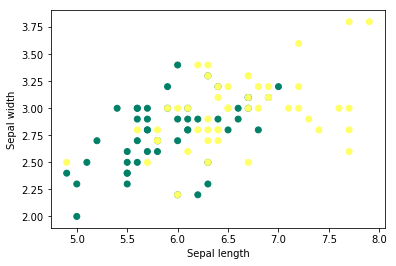

In [93]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.summer)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

Text(0,0.5,'petal width')

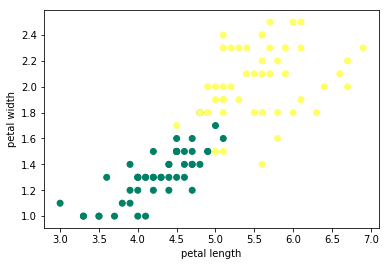

In [94]:
plt.scatter(X[:, 2], X[:, 3], c=y, cmap=plt.cm.summer)
plt.xlabel('petal length')
plt.ylabel('petal width')

2. Реализовать самостоятельно логистическую регрессию

In [95]:
from sklearn.linear_model import LogisticRegression

In [96]:
model = LogisticRegression()

In [97]:
model.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [98]:
y_pred = model.predict_proba(X)[:,1]

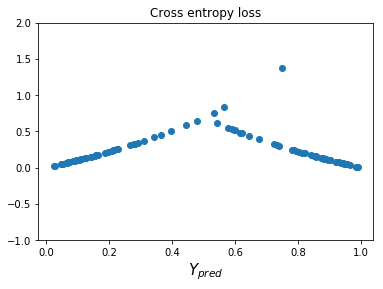

In [112]:
x_entropy_loss = - (y * np.log(y_pred)) - ((1. - y) * np.log(1. - y_pred))
#ploting the predicted values against the cross entropy loss
plt.plot(y_pred, x_entropy_loss, 'o' )
plt.title('Cross entropy loss')
plt.xlabel('$Y_{pred}$', fontsize=15)
plt.ylim(-1, 2)
plt.show()

3. Обучить ее методом градиентного спуска.

... продолжение следует